<a href="https://colab.research.google.com/github/Nathan12112006/Push/blob/main/HandSigns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

import the dataset

In [77]:
train_df = pd.read_csv("sign_mnist_train.csv")
test_df = pd.read_csv("sign_mnist_test.csv")

Look at the train and test shape and look at the first 5 rows of the data

In [78]:
print("Train Shape:",train_df.shape)
print("Test Shape:",test_df.shape)
print(train_df.head())

Train Shape: (27455, 785)
Test Shape: (7172, 785)
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  p

Get all the rows and columns starting at 1 for X_train AND
Get all the awnsers(labels) for y_train

In [79]:
X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values

Get all the rows and columns starting at 1 for X_test AND
Get all the awnsers(labels) for y_test

In [80]:
X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

When you look at the data it shows 785 columns, minus the label its 784.The read me on kaggle shows its 28X28 pixels,greyscale

We use CNN for classifying images.(-1)auto detects the number of images, (28,28) is the pixels and (1) is used for greyscale

We then call X_train & X_test.shape to see its new shape

In [81]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (27455, 28, 28, 1)
X_test shape:  (7172, 28, 28, 1)


see what the data looks like

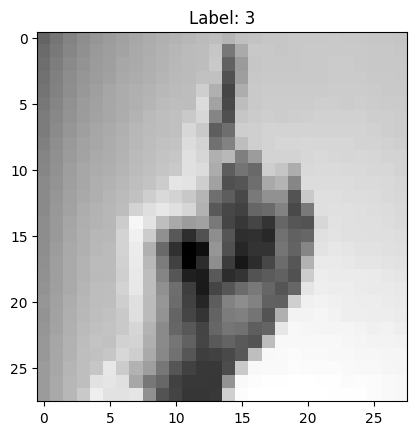

In [82]:
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

Normalize Pixel values by turning each number to a float then dividing it by 225 (bc its the maximun pixel value for greyscale)so you get a range between 0 and 1


In [83]:

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


to_categorial converts label numbersand  One Hot encodes it so the data is now in proper format for building the model

In [93]:
from tensorflow.keras.utils import to_categorical
import numpy as np


unique_labels = np.unique(np.concatenate((y_train, y_test)))
label_map = {label: i for i, label in enumerate(unique_labels)}

y_train_remapped = np.array([label_map[label] for label in y_train])
y_test_remapped = np.array([label_map[label] for label in y_test])


num_classes = len(unique_labels)

y_train_cat = to_categorical(y_train_remapped, num_classes=num_classes)
y_test_cat = to_categorical(y_test_remapped, num_classes=num_classes)

Our next step is to build the model a CNN, which is the standard model for image classification. It works well with small grayscale images like ours, and it’s proven to work for similar datasets. We do this by using tensorflow



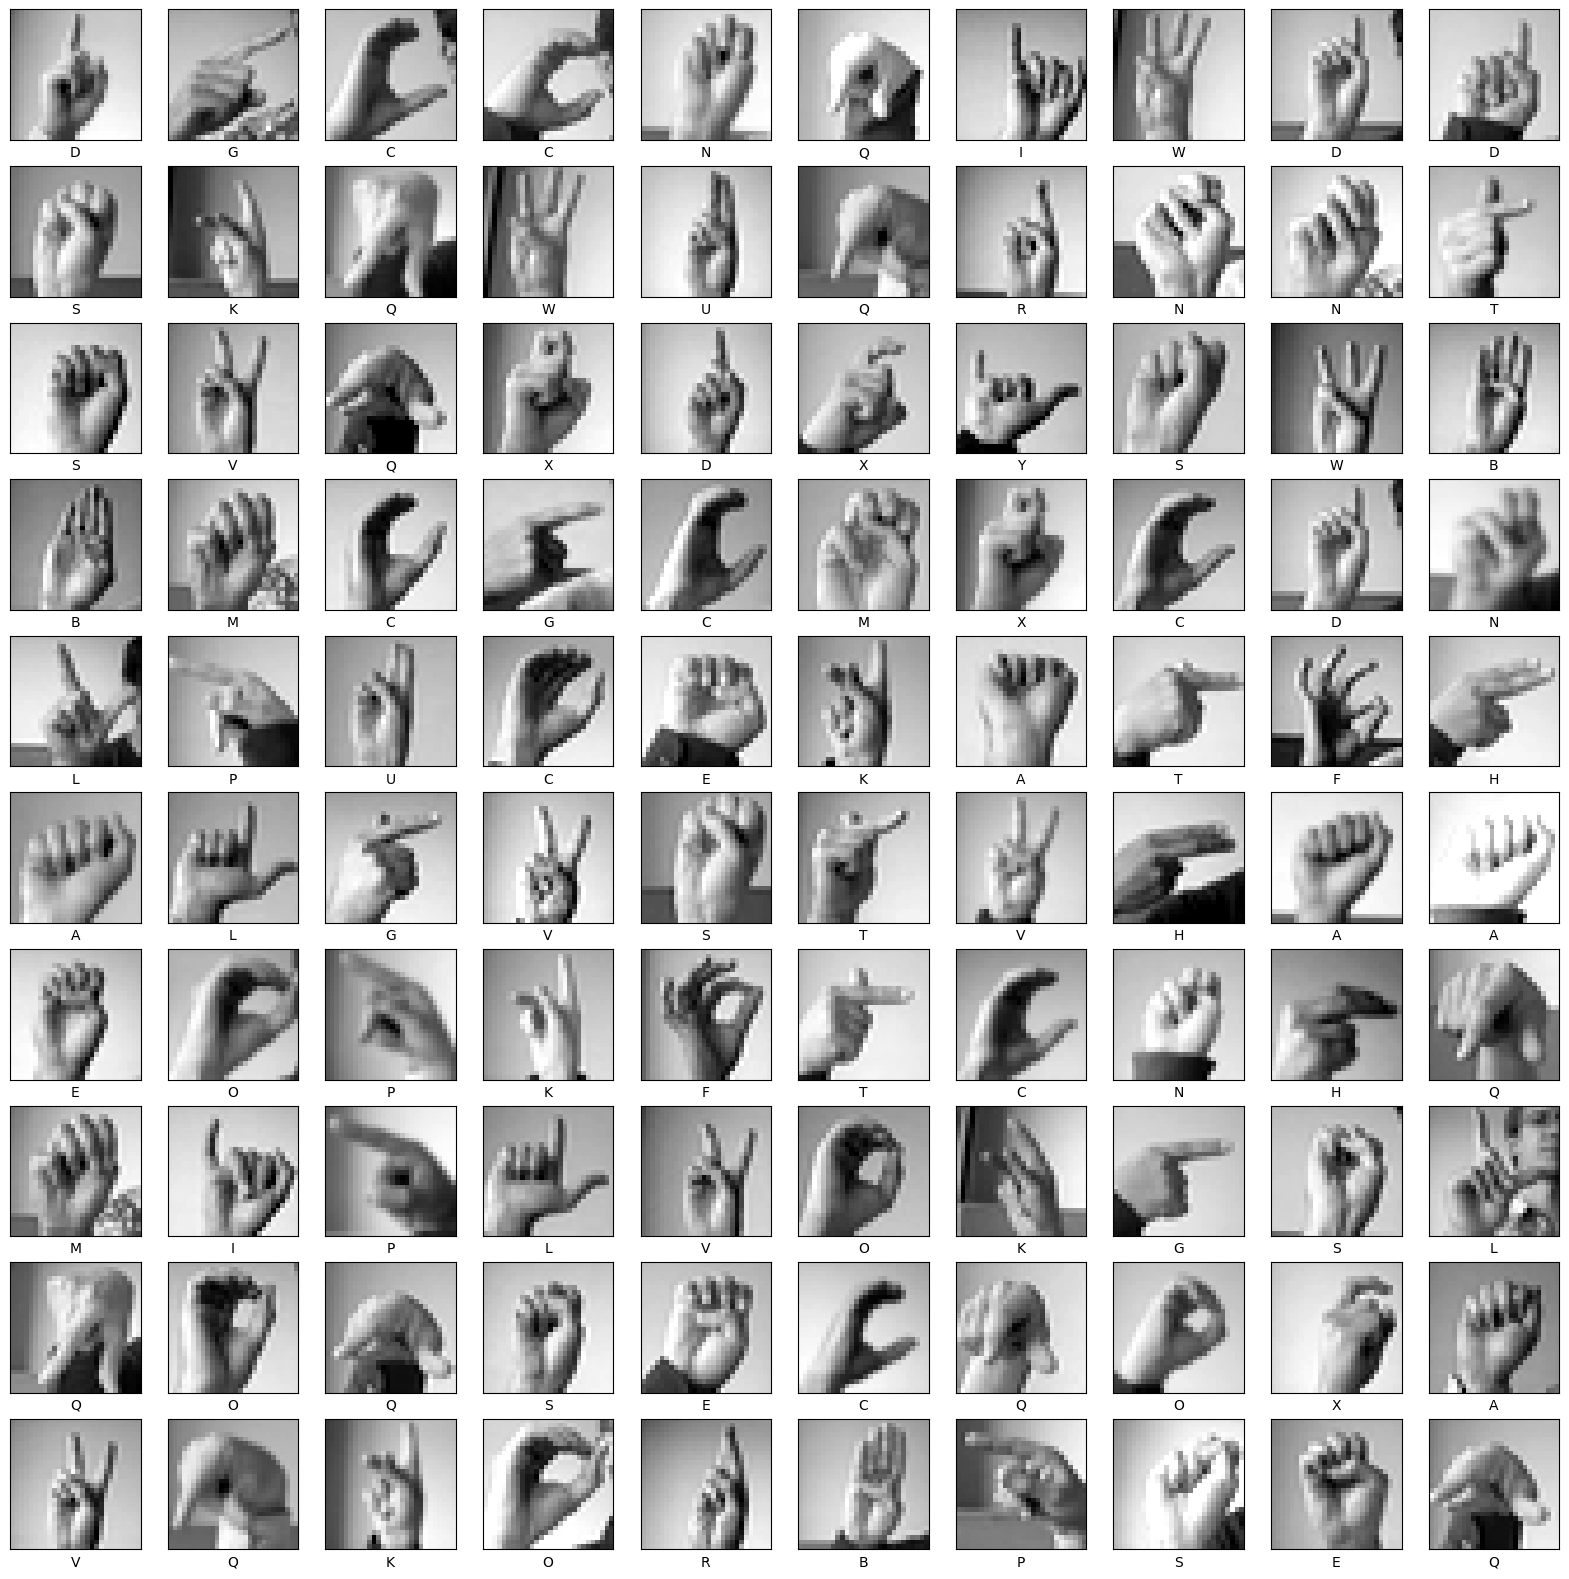

In [97]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

# Creating convolutional base

In [86]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [87]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

# Adding Dense layers

In [88]:
num_classes = len(np.unique(y_train))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes))

In [89]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 24)             │         1,560 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,232 (368.09 KB)

 Trainable params: 94,232 (368.09 KB)

 Non-trainable params: 0 (0.00 B)

# Compiling and training model

In [94]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train_cat, epochs=10,
                    validation_data=(X_test, y_test_cat))

Epoch 1/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 31s 34ms/step - accuracy: 0.4270 - loss: 1.8900 - val_accuracy: 0.8431 - val_loss: 0.4639
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9661 - loss: 0.1183 - val_accuracy: 0.8695 - val_loss: 0.5200
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9977 - loss: 0.0155 - val_accuracy: 0.8852 - val_loss: 0.4959
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9953 - loss: 0.0187 - val_accuracy: 0.9037 - val_loss: 0.4723
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accuracy: 1.0000 - loss: 9.7168e-04 - val_accuracy: 0.9119 - val_loss: 0.5161
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9943 - loss: 0.0176 - val_accuracy: 0.8617 - val_loss: 0.6707
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 28s 33ms/step - accuracy: 0.9975 - loss: 0.0119 - val_accuracy: 0.9208 - val_loss: 0.4702
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.9967 - loss: 0.010

225/225 - 2s - 9ms/step - accuracy: 0.9190 - loss: 0.5152


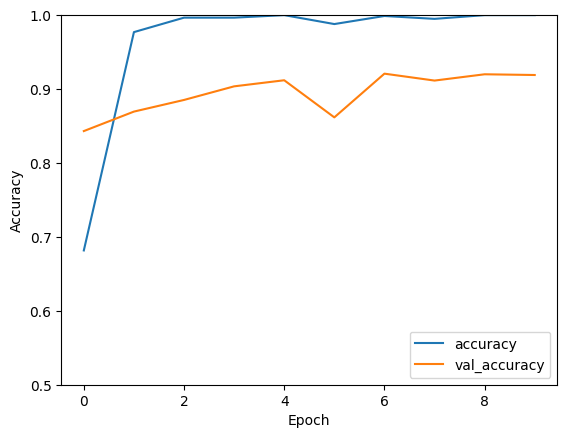

In [95]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test_cat, verbose=2)